# Biomodel SBML statistics
Development of SBML objects over the biomodel releases.

In [40]:
import os
import pandas as pd
stat_dir = "./statistics/"
dfs = []
for filename in sorted(os.listdir(stat_dir)):
    if filename.endswith(".tsv"):
        print(filename)
        path = os.path.join(stat_dir, filename)
        dfs.append(pd.read_csv(path, sep="\t"))

df = pd.concat(dfs)

R01_2005-04-11_curated.tsv
R02_2005-06-01_curated.tsv
R03_2005-07-28_curated.tsv
R04_2006-01-31_curated.tsv
R05_2006-06-05_curated.tsv
R06_2006-10-03_curated.tsv
R06_2006-10-03_non_curated.tsv
R07_2007-01-05_curated.tsv
R07_2007-01-05_non_curated.tsv
R08_2007-06-05_curated.tsv
R08_2007-06-05_non_curated.tsv
R09_2007-09-25_curated.tsv
R09_2007-09-25_non_curated.tsv
R10_2008-03-28_curated.tsv
R10_2008-03-28_non_curated.tsv
R11_2008-08-21_curated.tsv
R11_2008-08-21_non_curated.tsv
R12_2008-12-03_curated.tsv
R12_2008-12-03_non_curated.tsv
R13_2009-03-25_curated.tsv
R13_2009-03-25_non_curated.tsv
R14_2009-06-16_curated.tsv
R14_2009-06-16_non_curated.tsv
R15_2009-09-02_curated.tsv
R15_2009-09-02_non_curated.tsv
R16_2010-01-26_curated.tsv
R16_2010-01-26_non_curated.tsv
R17_2010-04-27_curated.tsv
R17_2010-04-27_non_curated.tsv
R18_2010-09-30_curated.tsv
R18_2010-09-30_non_curated.tsv
R19_2011-04-15_curated.tsv
R19_2011-04-15_non_curated.tsv
R20_2011-09-01_curated.tsv
R20_2011-09-01_non_curated

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")

plt.rcParams.update({
        'axes.labelsize': 'large',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'legend.fontsize': 'medium',
        'xtick.labelsize': 'small',
        'ytick.labelsize': 'large',
        'figure.facecolor': '1.00'
    })

In [75]:
# add the all data to the data set
df_all = df.copy()
df_all.status = "all"
df_box = pd.concat([df, df_all])

ymax_dict = {
    "math": 250,
    "function_definitions": 20,
    "unit_definitions": 35,
    "compartments": 10,
    "species": 5000,
    "parameters": 300,
    "initial_assignments": 20,
    "rules": 120,
    "reactions": 3000,
    "compartments": 5,
    "events": 3,
    "kinetic_laws": 5000,
    "kinetic_laws_math": 300,
    "parameters_local": 5000,
    "events_math": 10
}

def print_statistics(yid):
    # print results
    print("-" * 80)
    print(yid)
    print("-" * 80)
    for release in sorted(df_all.release.unique()):
        df_R = df_all[df_all.release==release]
        print("Biomodels {}: {:.2f} [{:.2f}-{:.2f}] (mean={:.2f})".format(release,
                                                                          df_R[yid].quantile(q=0.5), 
                                                                          df_R[yid].quantile(q=0.25), 
                                                                          df_R[yid].quantile(q=0.75), 
                                                                          df_R[yid].mean()))

def boxplot_statistics(yid):
    # boxplots
    f, (ax1, ax2) = plt.subplots(figsize=(24, 7), ncols=2, nrows=1)
    sns_ax1 = sns.boxplot(x="release", y=yid,
                hue="status", fliersize=1,
                data=df_box, ax=ax1)
    sns_ax2 = sns.boxplot(x="release", y=yid,
                hue="status", fliersize=1,
                data=df_box, ax=ax2)

    for ax in (sns_ax1, sns_ax2):
        for item in ax.get_xticklabels():
            item.set_rotation(45)

    for ax in (ax1, ax2):
        ax.set_title(yid);

    # set max y-value for second boxplot
    if ymax_dict.get(yid, None):
        ax2.set_ylim(-1, ymax_dict[yid])

    f.savefig("./figures/biomodels_{}.png".format(yid), bbox_inches="tight")
    plt.show()
    
# yid = "math"
# print_statistics(yid)
# boxplot_statistics(yid)

--------------------------------------------------------------------------------
math
--------------------------------------------------------------------------------
Biomodels R01: 13.50 [9.00-24.75] (mean=26.80)
Biomodels R02: 13.50 [9.00-24.75] (mean=26.80)
Biomodels R03: 12.00 [8.00-25.25] (mean=23.11)
Biomodels R04: 12.50 [8.25-25.00] (mean=24.82)
Biomodels R05: 13.50 [8.25-25.75] (mean=26.80)
Biomodels R06: 14.00 [8.00-25.00] (mean=51.55)
Biomodels R07: 14.00 [8.00-28.00] (mean=46.63)
Biomodels R08: 15.00 [8.00-30.00] (mean=45.47)
Biomodels R09: 15.00 [9.00-30.00] (mean=39.82)
Biomodels R10: 17.00 [9.00-42.75] (mean=63.50)
Biomodels R11: 17.50 [9.00-44.25] (mean=63.47)
Biomodels R12: 18.00 [9.00-41.00] (mean=68.40)
Biomodels R13: 19.00 [9.00-44.50] (mean=65.13)
Biomodels R14: 19.00 [9.75-49.50] (mean=62.23)
Biomodels R15: 19.00 [9.00-49.00] (mean=62.92)
Biomodels R16: 19.00 [9.00-48.00] (mean=60.89)
Biomodels R17: 20.00 [9.00-48.00] (mean=64.50)
Biomodels R18: 20.00 [9.00-54.00] 

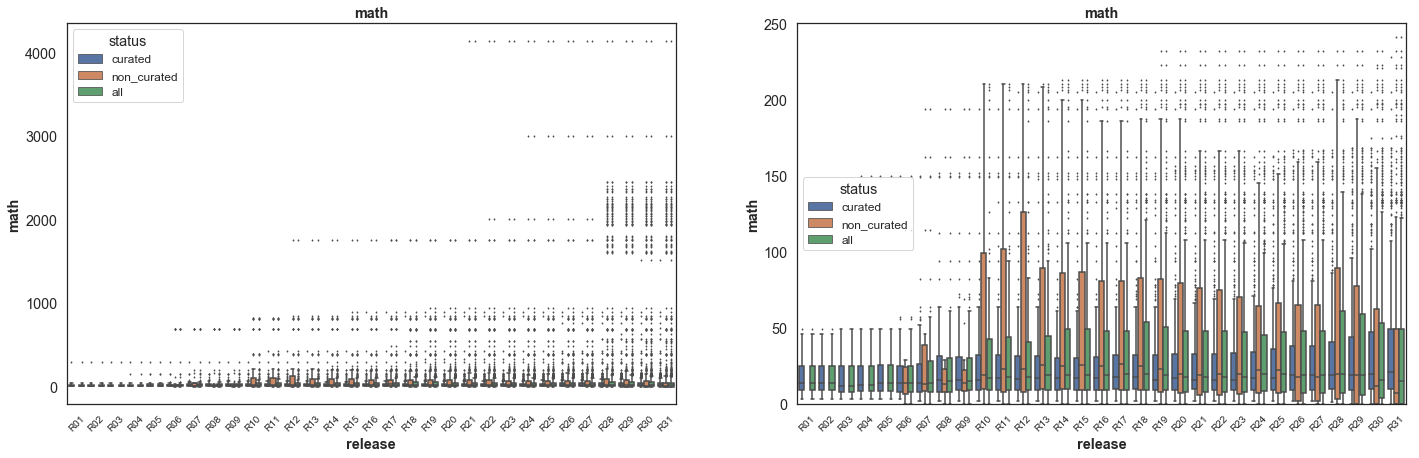

--------------------------------------------------------------------------------
function_definitions
--------------------------------------------------------------------------------
Biomodels R01: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R02: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R03: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R04: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R05: 0.00 [0.00-0.00] (mean=0.13)
Biomodels R06: 0.00 [0.00-0.00] (mean=0.07)
Biomodels R07: 0.00 [0.00-0.00] (mean=0.27)
Biomodels R08: 0.00 [0.00-0.00] (mean=0.21)
Biomodels R09: 0.00 [0.00-0.00] (mean=0.18)
Biomodels R10: 0.00 [0.00-0.00] (mean=0.14)
Biomodels R11: 0.00 [0.00-0.00] (mean=0.28)
Biomodels R12: 0.00 [0.00-0.00] (mean=0.28)
Biomodels R13: 0.00 [0.00-0.00] (mean=0.28)
Biomodels R14: 0.00 [0.00-0.00] (mean=0.25)
Biomodels R15: 0.00 [0.00-0.00] (mean=0.24)
Biomodels R16: 0.00 [0.00-0.00] (mean=0.23)
Biomodels R17: 0.00 [0.00-0.00] (mean=0.23)
Biomodels R18: 0.00 [0.00-0.00] (mean=0.32)
Biomodels R19: 0.00 [0.00

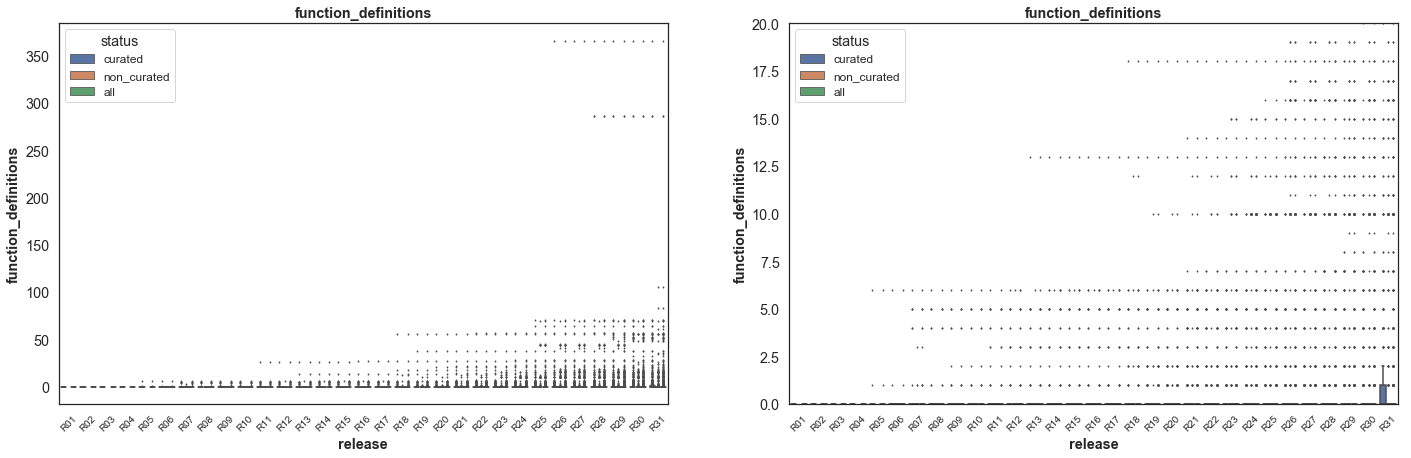

--------------------------------------------------------------------------------
unit_definitions
--------------------------------------------------------------------------------
Biomodels R01: 1.00 [0.00-2.00] (mean=1.10)
Biomodels R02: 1.00 [0.00-2.00] (mean=1.10)
Biomodels R03: 1.00 [0.00-2.00] (mean=1.20)
Biomodels R04: 1.00 [0.25-2.00] (mean=1.24)
Biomodels R05: 1.00 [0.25-2.00] (mean=1.20)
Biomodels R06: 1.00 [0.00-2.00] (mean=1.84)
Biomodels R07: 1.00 [0.00-2.00] (mean=1.88)
Biomodels R08: 2.00 [1.00-3.00] (mean=2.20)
Biomodels R09: 1.00 [0.00-3.00] (mean=1.92)
Biomodels R10: 2.00 [0.00-3.00] (mean=2.41)
Biomodels R11: 2.00 [1.00-3.00] (mean=2.59)
Biomodels R12: 2.00 [1.00-4.00] (mean=2.68)
Biomodels R13: 2.00 [0.00-4.00] (mean=3.19)
Biomodels R14: 2.00 [1.00-5.00] (mean=4.55)
Biomodels R15: 2.00 [1.00-5.00] (mean=4.46)
Biomodels R16: 2.00 [1.00-5.00] (mean=4.49)
Biomodels R17: 2.00 [1.00-5.00] (mean=4.46)
Biomodels R18: 3.00 [1.00-7.00] (mean=5.96)
Biomodels R19: 3.00 [1.00-7.0

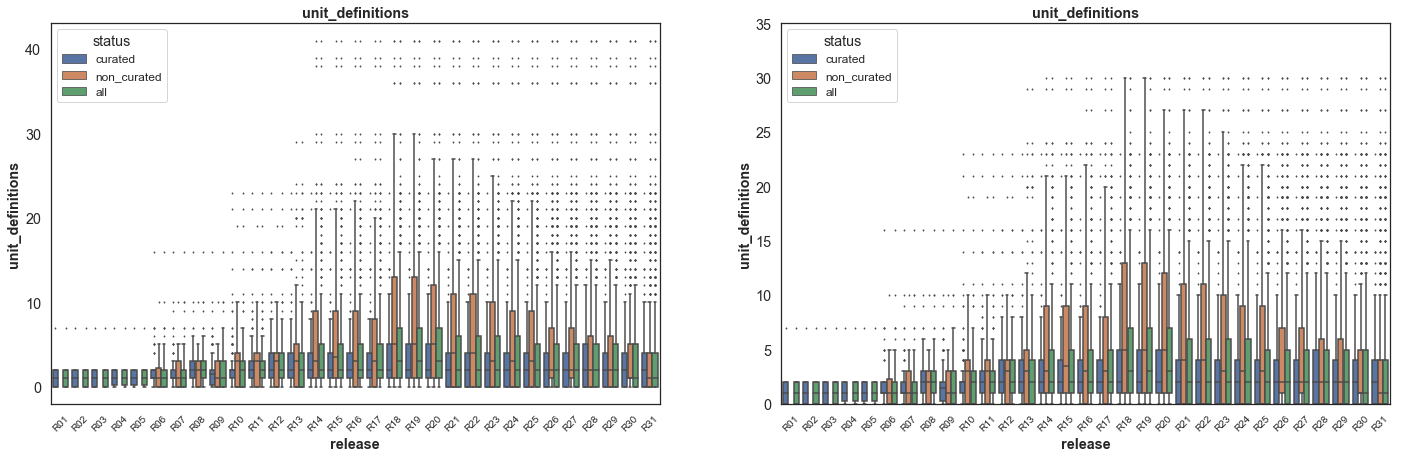

--------------------------------------------------------------------------------
compartments
--------------------------------------------------------------------------------
Biomodels R01: 1.00 [1.00-1.00] (mean=1.23)
Biomodels R02: 1.00 [1.00-1.00] (mean=1.23)
Biomodels R03: 1.00 [1.00-2.00] (mean=1.43)
Biomodels R04: 1.00 [1.00-2.00] (mean=1.42)
Biomodels R05: 1.00 [1.00-1.75] (mean=1.39)
Biomodels R06: 1.00 [1.00-2.00] (mean=1.36)
Biomodels R07: 1.00 [1.00-2.00] (mean=1.48)
Biomodels R08: 1.00 [1.00-2.00] (mean=1.52)
Biomodels R09: 1.00 [1.00-2.00] (mean=1.51)
Biomodels R10: 1.00 [1.00-2.00] (mean=1.68)
Biomodels R11: 1.00 [1.00-2.00] (mean=1.70)
Biomodels R12: 1.00 [1.00-2.00] (mean=1.68)
Biomodels R13: 1.00 [1.00-2.00] (mean=1.64)
Biomodels R14: 1.00 [1.00-2.00] (mean=1.52)
Biomodels R15: 1.00 [1.00-2.00] (mean=1.55)
Biomodels R16: 1.00 [1.00-2.00] (mean=1.56)
Biomodels R17: 1.00 [1.00-2.00] (mean=1.56)
Biomodels R18: 1.00 [1.00-2.00] (mean=1.48)
Biomodels R19: 1.00 [1.00-2.00] (

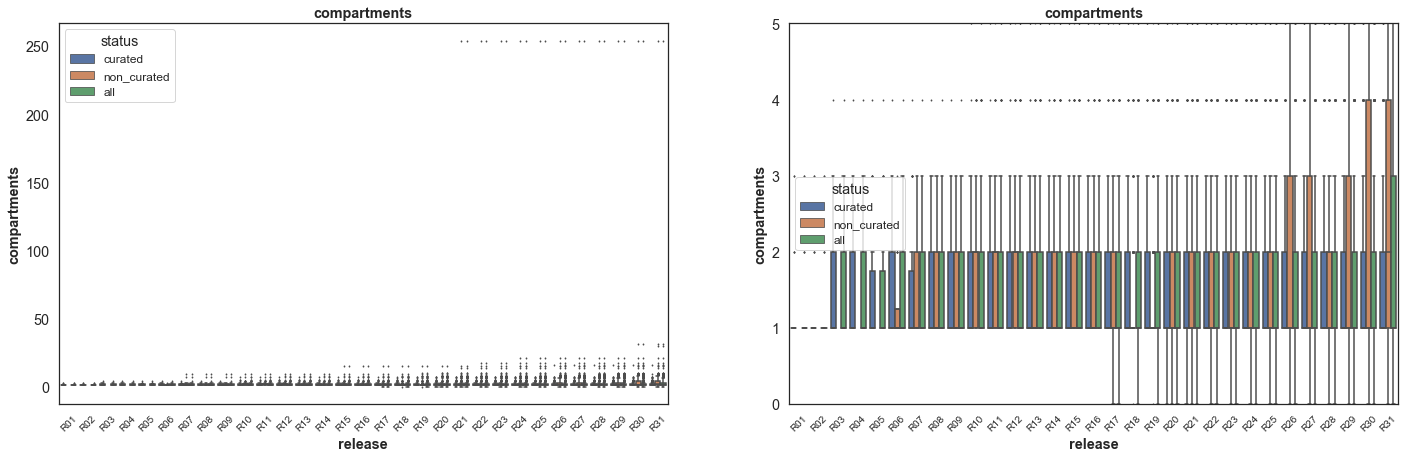

--------------------------------------------------------------------------------
species
--------------------------------------------------------------------------------
Biomodels R01: 10.50 [6.00-18.00] (mean=14.17)
Biomodels R02: 10.50 [6.00-18.00] (mean=14.17)
Biomodels R03: 10.00 [5.00-17.25] (mean=13.55)
Biomodels R04: 10.50 [5.25-17.75] (mean=15.22)
Biomodels R05: 10.50 [5.25-17.75] (mean=15.50)
Biomodels R06: 11.00 [6.00-18.75] (mean=43.54)
Biomodels R07: 12.00 [7.00-19.25] (mean=44.51)
Biomodels R08: 13.00 [7.00-19.00] (mean=41.57)
Biomodels R09: 12.00 [5.00-21.25] (mean=54.59)
Biomodels R10: 14.00 [5.75-28.00] (mean=85.84)
Biomodels R11: 13.00 [6.00-29.00] (mean=84.43)
Biomodels R12: 13.00 [6.00-29.00] (mean=92.96)
Biomodels R13: 13.00 [5.00-28.00] (mean=85.95)
Biomodels R14: 9.00 [0.00-24.00] (mean=70.15)
Biomodels R15: 9.00 [0.00-25.00] (mean=74.62)
Biomodels R16: 9.00 [0.00-24.00] (mean=74.40)
Biomodels R17: 9.00 [0.00-26.00] (mean=80.03)
Biomodels R18: 6.00 [0.00-21.00] (m

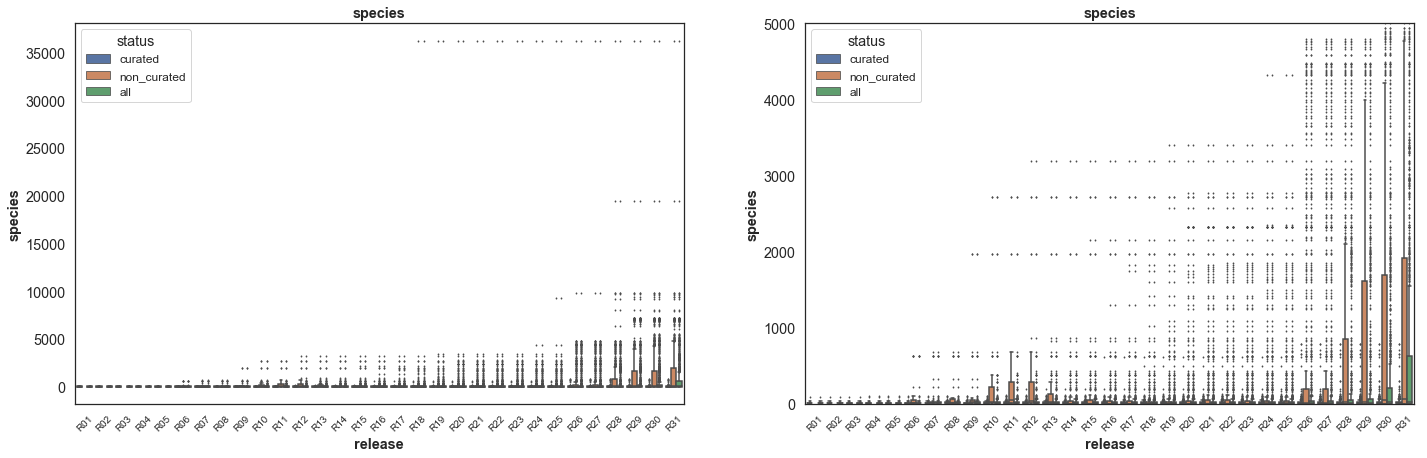

--------------------------------------------------------------------------------
parameters
--------------------------------------------------------------------------------
Biomodels R01: 0.00 [0.00-13.50] (mean=8.80)
Biomodels R02: 0.00 [0.00-13.50] (mean=8.80)
Biomodels R03: 0.50 [0.00-10.50] (mean=8.86)
Biomodels R04: 0.00 [0.00-9.00] (mean=8.04)
Biomodels R05: 0.50 [0.00-12.00] (mean=11.91)
Biomodels R06: 0.00 [0.00-9.75] (mean=10.06)
Biomodels R07: 0.00 [0.00-9.25] (mean=11.45)
Biomodels R08: 1.00 [0.00-17.00] (mean=13.03)
Biomodels R09: 4.00 [0.00-21.00] (mean=15.11)
Biomodels R10: 3.00 [0.00-21.00] (mean=14.76)
Biomodels R11: 5.00 [0.00-21.75] (mean=16.29)
Biomodels R12: 7.00 [0.00-22.00] (mean=17.00)
Biomodels R13: 9.00 [0.00-32.00] (mean=25.49)
Biomodels R14: 15.00 [0.00-44.25] (mean=36.83)
Biomodels R15: 15.00 [0.00-45.00] (mean=37.14)
Biomodels R16: 16.00 [0.00-45.00] (mean=37.30)
Biomodels R17: 17.00 [1.00-46.00] (mean=39.28)
Biomodels R18: 20.50 [5.00-56.00] (mean=54.13)
B

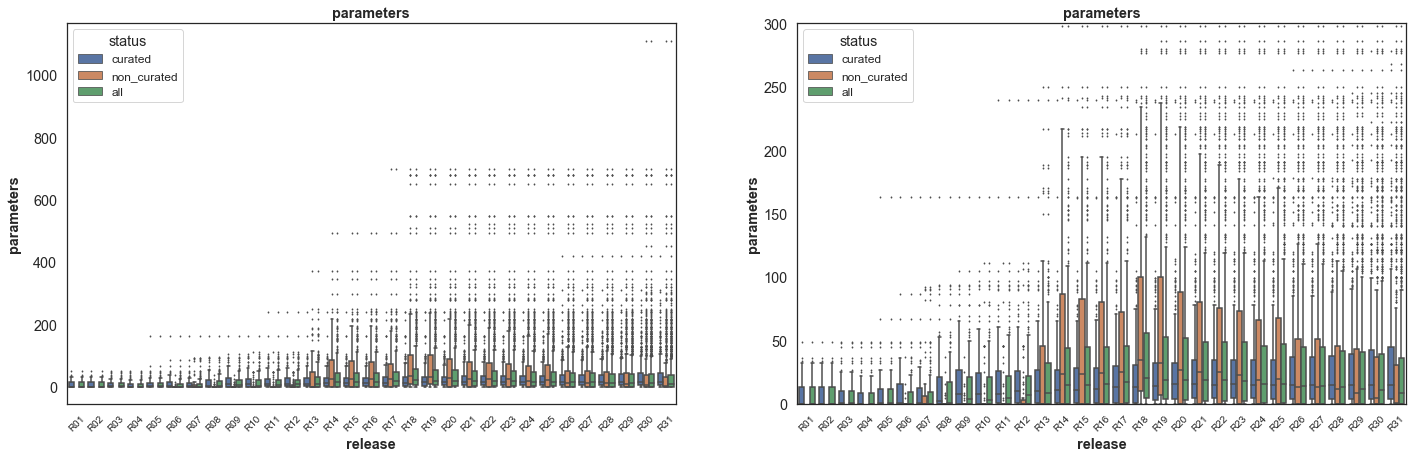

--------------------------------------------------------------------------------
initial_assignments
--------------------------------------------------------------------------------
Biomodels R01: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R02: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R03: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R04: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R05: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R06: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R07: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R08: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R09: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R10: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R11: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R12: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R13: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R14: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R15: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R16: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R17: 0.00 [0.00-0.00] (mean=1.49)
Biomodels R18: 0.00 [0.00-0.00] (mean=1.14)
Biomodels R19: 0.00 [0.00-

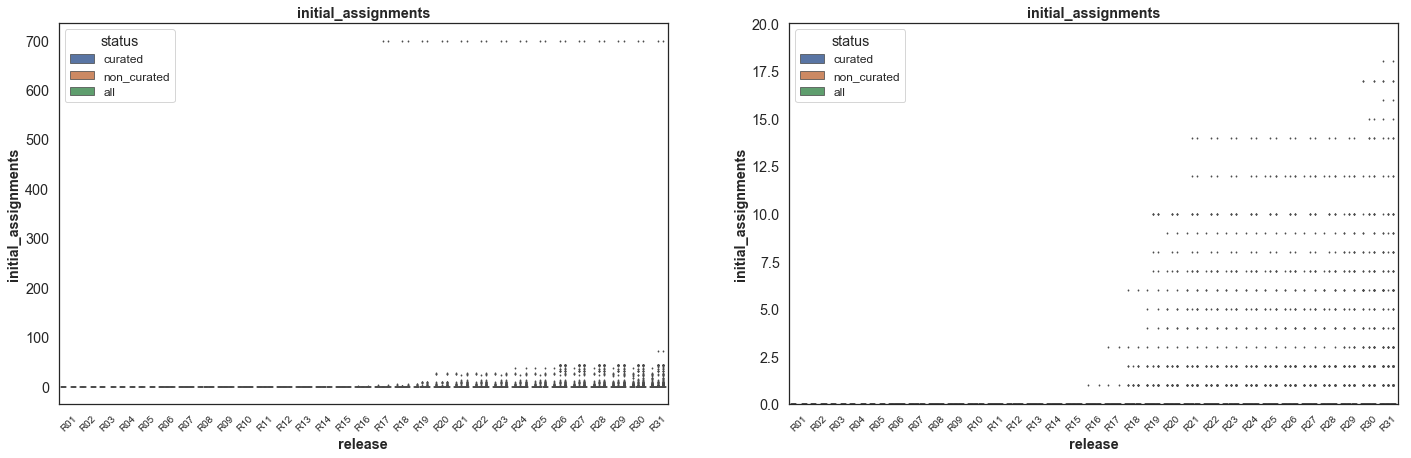

--------------------------------------------------------------------------------
rules
--------------------------------------------------------------------------------
Biomodels R01: 0.00 [0.00-0.00] (mean=1.33)
Biomodels R02: 0.00 [0.00-0.00] (mean=1.33)
Biomodels R03: 0.00 [0.00-0.00] (mean=1.05)
Biomodels R04: 0.00 [0.00-0.00] (mean=1.00)
Biomodels R05: 0.00 [0.00-0.00] (mean=1.69)
Biomodels R06: 0.00 [0.00-1.00] (mean=2.05)
Biomodels R07: 0.00 [0.00-1.00] (mean=1.84)
Biomodels R08: 0.00 [0.00-1.00] (mean=1.78)
Biomodels R09: 0.00 [0.00-2.00] (mean=2.34)
Biomodels R10: 0.00 [0.00-2.00] (mean=2.79)
Biomodels R11: 0.00 [0.00-2.75] (mean=2.99)
Biomodels R12: 0.00 [0.00-3.00] (mean=2.93)
Biomodels R13: 0.00 [0.00-3.00] (mean=6.46)
Biomodels R14: 1.00 [0.00-9.25] (mean=14.21)
Biomodels R15: 1.00 [0.00-9.00] (mean=13.81)
Biomodels R16: 2.00 [0.00-10.00] (mean=14.04)
Biomodels R17: 2.00 [0.00-10.00] (mean=13.64)
Biomodels R18: 3.00 [0.00-16.00] (mean=25.07)
Biomodels R19: 3.00 [0.00-14.00]

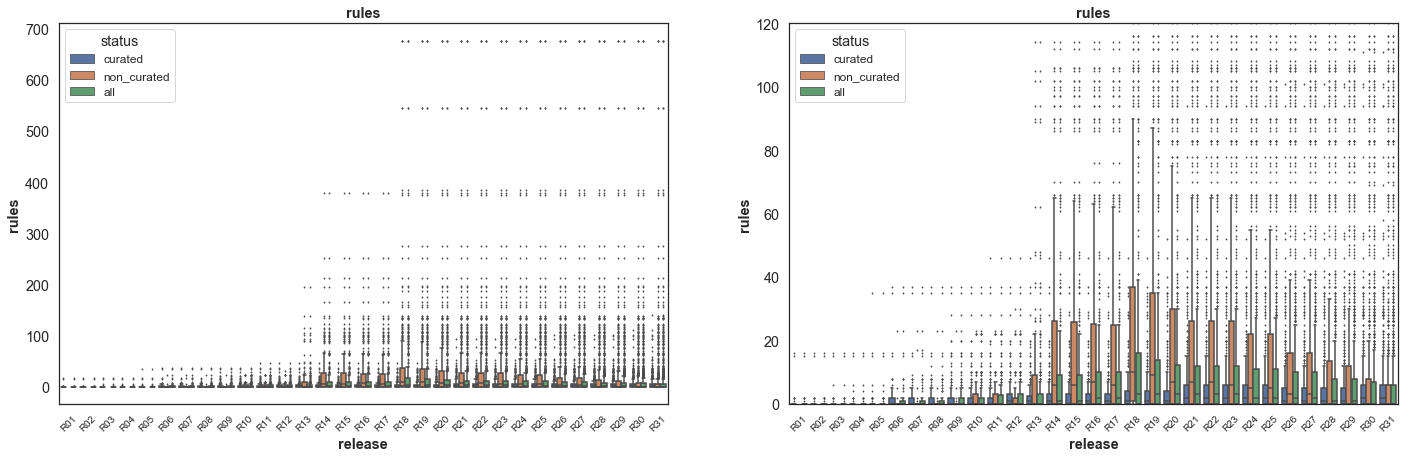

--------------------------------------------------------------------------------
reactions
--------------------------------------------------------------------------------
Biomodels R01: 12.50 [7.00-20.75] (mean=24.53)
Biomodels R02: 12.50 [7.00-20.75] (mean=24.53)
Biomodels R03: 11.50 [7.00-21.25] (mean=21.43)
Biomodels R04: 12.00 [7.00-21.75] (mean=23.26)
Biomodels R05: 12.00 [7.00-23.50] (mean=24.20)
Biomodels R06: 12.50 [7.00-23.50] (mean=51.28)
Biomodels R07: 12.50 [7.00-26.50] (mean=50.24)
Biomodels R08: 14.00 [7.00-29.00] (mean=48.39)
Biomodels R09: 13.00 [6.00-28.25] (mean=65.01)
Biomodels R10: 16.00 [7.00-45.00] (mean=105.45)
Biomodels R11: 17.00 [7.00-45.75] (mean=105.10)
Biomodels R12: 17.00 [7.00-45.00] (mean=117.55)
Biomodels R13: 15.00 [6.00-41.00] (mean=107.90)
Biomodels R14: 10.50 [0.00-29.25] (mean=88.02)
Biomodels R15: 11.00 [0.00-31.00] (mean=91.59)
Biomodels R16: 10.00 [0.00-30.00] (mean=90.66)
Biomodels R17: 11.00 [0.00-32.00] (mean=94.90)
Biomodels R18: 7.00 [0.00

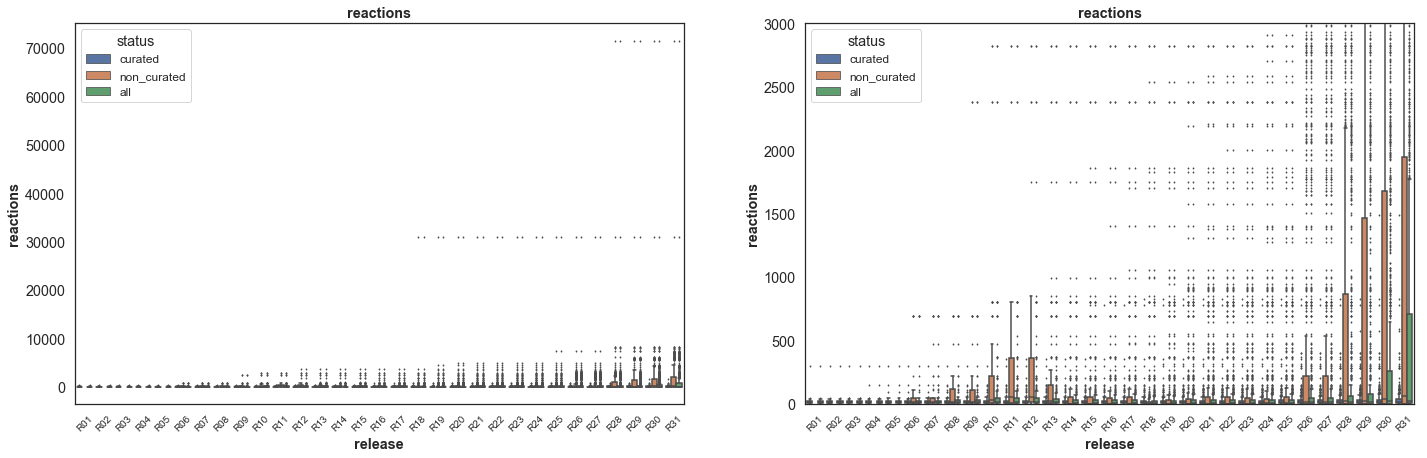

--------------------------------------------------------------------------------
constraints
--------------------------------------------------------------------------------
Biomodels R01: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R02: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R03: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R04: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R05: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R06: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R07: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R08: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R09: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R10: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R11: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R12: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R13: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R14: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R15: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R16: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R17: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R18: 0.00 [0.00-0.00] (mean=0.00)
Biomodels R19: 0.00 [0.00-0.00] (m

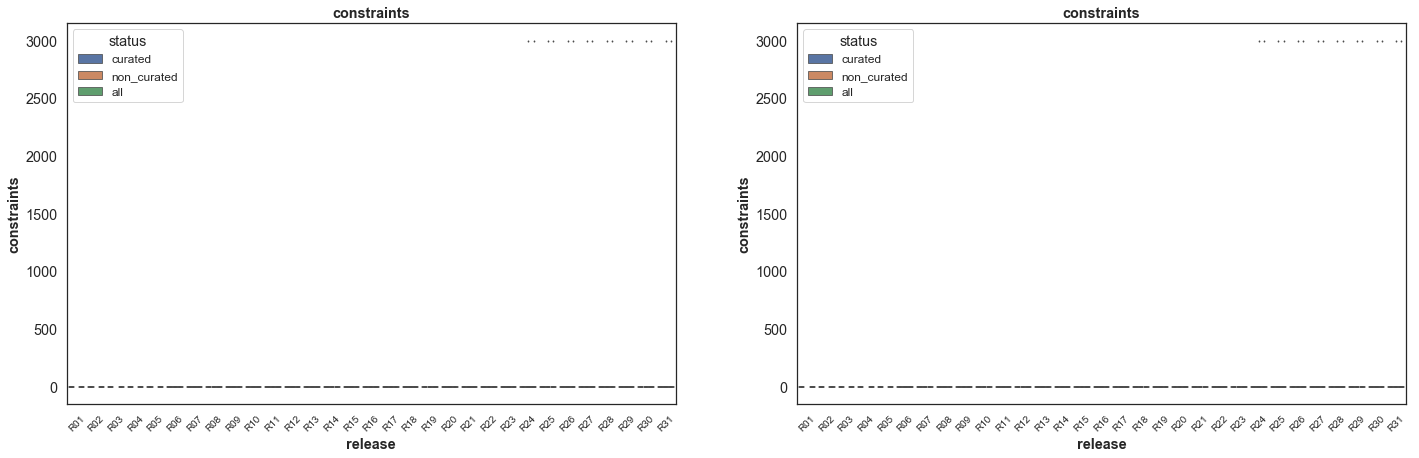

--------------------------------------------------------------------------------
events
--------------------------------------------------------------------------------
Biomodels R01: 0.00 [0.00-0.00] (mean=0.20)
Biomodels R02: 0.00 [0.00-0.00] (mean=0.20)
Biomodels R03: 0.00 [0.00-0.00] (mean=0.14)
Biomodels R04: 0.00 [0.00-0.00] (mean=0.12)
Biomodels R05: 0.00 [0.00-0.00] (mean=0.19)
Biomodels R06: 0.00 [0.00-0.00] (mean=0.12)
Biomodels R07: 0.00 [0.00-0.00] (mean=0.55)
Biomodels R08: 0.00 [0.00-0.00] (mean=0.54)
Biomodels R09: 0.00 [0.00-0.00] (mean=0.73)
Biomodels R10: 0.00 [0.00-0.00] (mean=0.60)
Biomodels R11: 0.00 [0.00-0.00] (mean=0.57)
Biomodels R12: 0.00 [0.00-0.00] (mean=0.52)
Biomodels R13: 0.00 [0.00-0.00] (mean=0.47)
Biomodels R14: 0.00 [0.00-0.00] (mean=0.39)
Biomodels R15: 0.00 [0.00-0.00] (mean=0.40)
Biomodels R16: 0.00 [0.00-0.00] (mean=0.39)
Biomodels R17: 0.00 [0.00-0.00] (mean=0.39)
Biomodels R18: 0.00 [0.00-0.00] (mean=0.30)
Biomodels R19: 0.00 [0.00-0.00] (mean=0

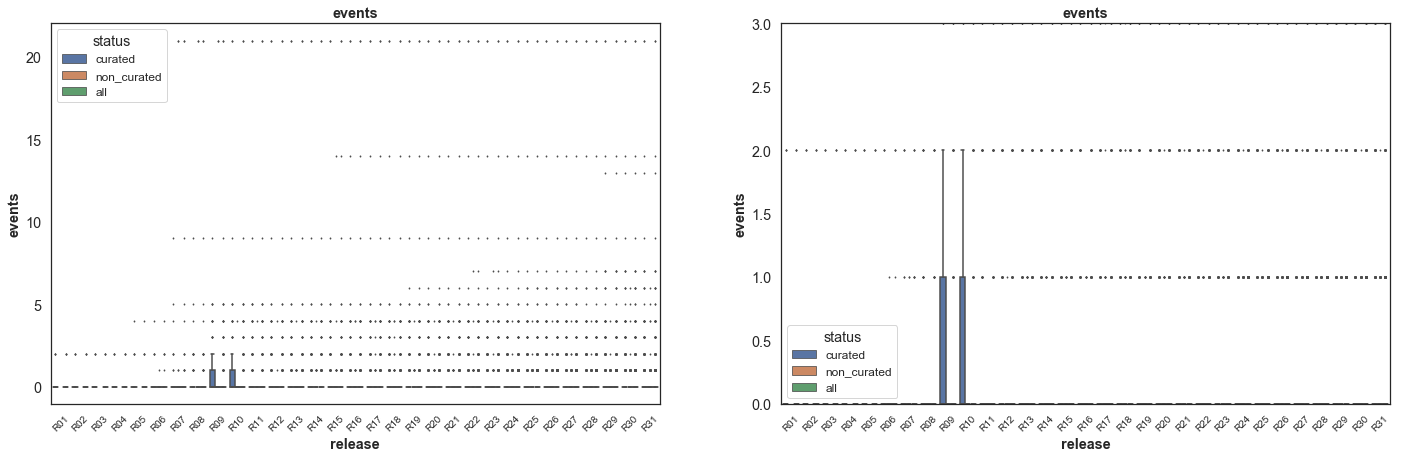

--------------------------------------------------------------------------------
kinetic_laws
--------------------------------------------------------------------------------
Biomodels R01: 12.50 [7.00-20.75] (mean=24.53)
Biomodels R02: 12.50 [7.00-20.75] (mean=24.53)
Biomodels R03: 11.50 [7.00-21.25] (mean=21.43)
Biomodels R04: 12.00 [7.00-21.75] (mean=23.26)
Biomodels R05: 12.00 [7.00-23.50] (mean=24.20)
Biomodels R06: 12.00 [7.00-21.75] (mean=48.95)
Biomodels R07: 12.00 [7.00-25.00] (mean=43.13)
Biomodels R08: 14.00 [7.00-25.00] (mean=42.11)
Biomodels R09: 12.50 [6.00-25.00] (mean=60.27)
Biomodels R10: 14.50 [6.00-42.25] (mean=78.58)
Biomodels R11: 15.50 [6.00-41.75] (mean=77.24)
Biomodels R12: 15.00 [6.00-37.00] (mean=80.13)
Biomodels R13: 13.00 [5.00-32.50] (mean=71.40)
Biomodels R14: 10.00 [0.00-25.00] (mean=58.35)
Biomodels R15: 10.00 [0.00-26.00] (mean=58.77)
Biomodels R16: 9.00 [0.00-25.00] (mean=55.96)
Biomodels R17: 10.00 [0.00-28.00] (mean=61.66)
Biomodels R18: 6.00 [0.00-2

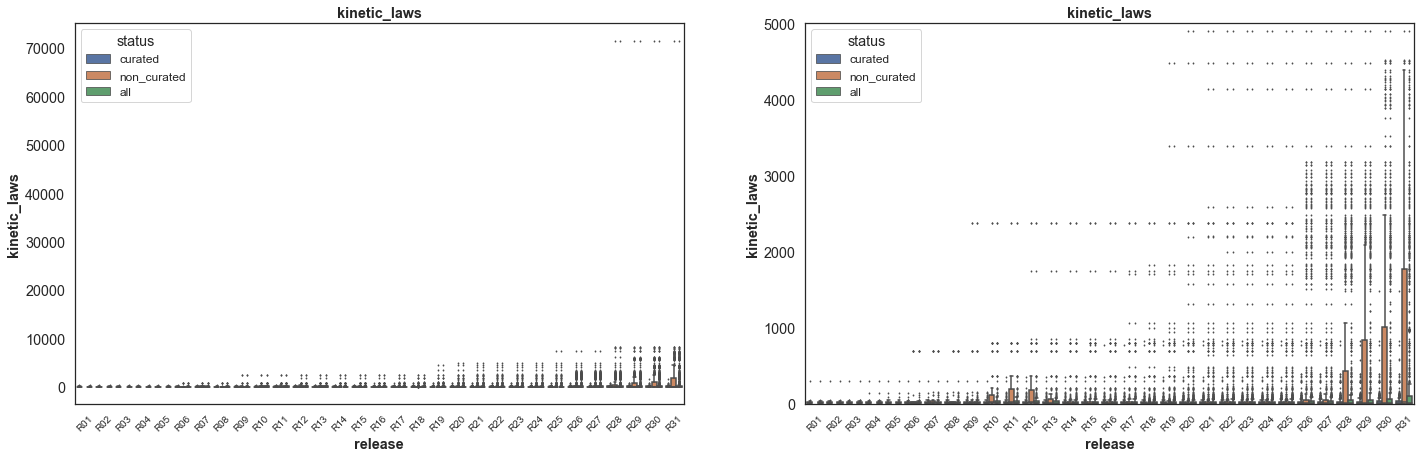

--------------------------------------------------------------------------------
kinetic_laws_math
--------------------------------------------------------------------------------
Biomodels R01: 12.50 [7.00-20.75] (mean=24.53)
Biomodels R02: 12.50 [7.00-20.75] (mean=24.53)
Biomodels R03: 11.50 [7.00-21.25] (mean=21.43)
Biomodels R04: 12.00 [7.00-21.75] (mean=23.26)
Biomodels R05: 12.00 [7.00-23.50] (mean=24.20)
Biomodels R06: 12.00 [7.00-21.75] (mean=48.95)
Biomodels R07: 12.00 [7.00-25.00] (mean=43.13)
Biomodels R08: 14.00 [7.00-25.00] (mean=42.11)
Biomodels R09: 12.00 [6.00-25.00] (mean=35.46)
Biomodels R10: 14.00 [6.00-38.75] (mean=59.05)
Biomodels R11: 15.00 [6.00-37.75] (mean=58.77)
Biomodels R12: 15.00 [6.00-34.00] (mean=63.87)
Biomodels R13: 13.00 [5.00-32.00] (mean=57.18)
Biomodels R14: 10.00 [0.00-25.00] (mean=46.78)
Biomodels R15: 10.00 [0.00-25.00] (mean=47.66)
Biomodels R16: 9.00 [0.00-24.00] (mean=45.44)
Biomodels R17: 10.00 [0.00-26.00] (mean=47.98)
Biomodels R18: 5.00 [0

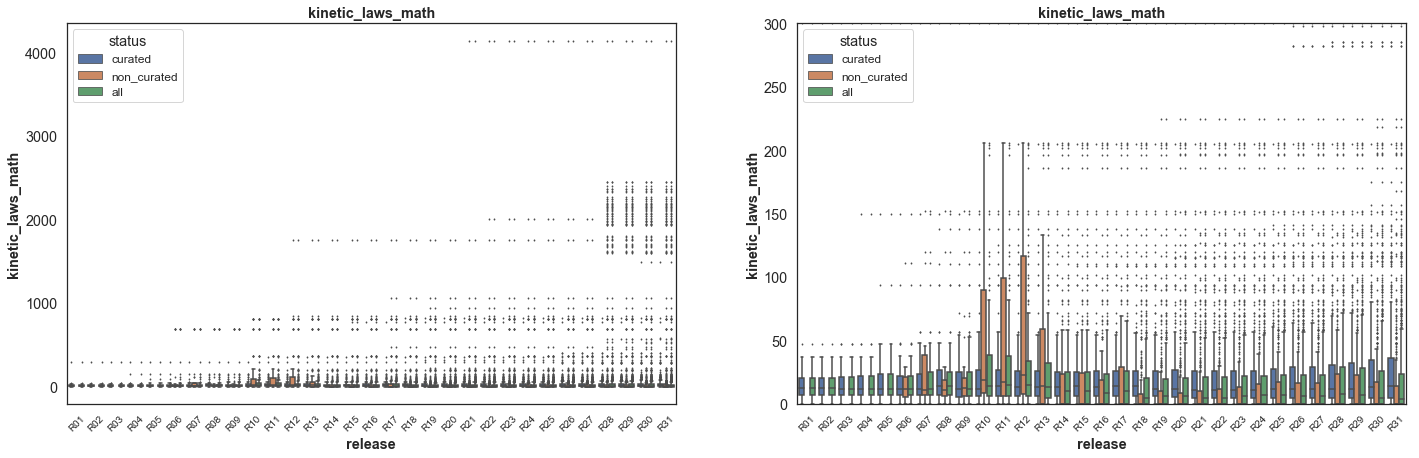

--------------------------------------------------------------------------------
parameters_local
--------------------------------------------------------------------------------
Biomodels R01: 10.00 [0.00-40.50] (mean=34.27)
Biomodels R02: 10.00 [0.00-40.50] (mean=34.27)
Biomodels R03: 10.00 [0.00-26.25] (mean=27.55)
Biomodels R04: 11.00 [1.00-28.75] (mean=30.84)
Biomodels R05: 10.50 [0.00-28.00] (mean=29.13)
Biomodels R06: 15.50 [4.00-53.00] (mean=151.37)
Biomodels R07: 14.50 [3.50-49.00] (mean=118.68)
Biomodels R08: 11.00 [0.00-47.00] (mean=105.74)
Biomodels R09: 8.00 [0.00-43.25] (mean=207.04)
Biomodels R10: 10.00 [0.00-69.25] (mean=207.86)
Biomodels R11: 8.00 [0.00-53.50] (mean=196.22)
Biomodels R12: 4.00 [0.00-50.00] (mean=195.29)
Biomodels R13: 0.00 [0.00-43.50] (mean=171.03)
Biomodels R14: 0.00 [0.00-19.25] (mean=139.27)
Biomodels R15: 0.00 [0.00-18.00] (mean=138.50)
Biomodels R16: 0.00 [0.00-18.00] (mean=131.41)
Biomodels R17: 0.00 [0.00-16.00] (mean=151.75)
Biomodels R18: 0.0

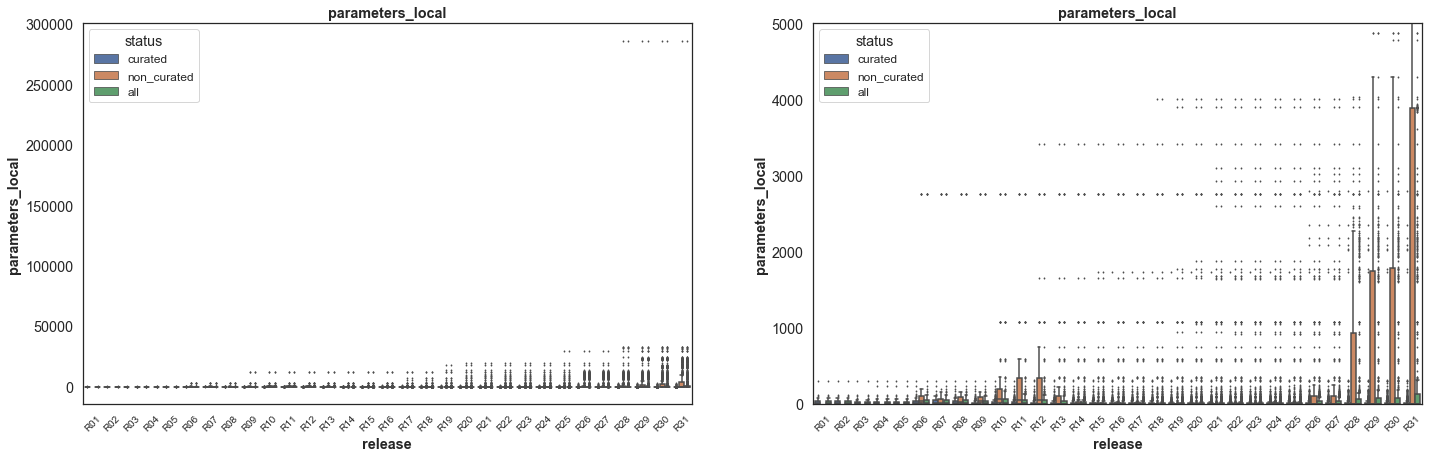

--------------------------------------------------------------------------------
events_math
--------------------------------------------------------------------------------
Biomodels R01: 0.00 [0.00-0.00] (mean=0.93)
Biomodels R02: 0.00 [0.00-0.00] (mean=0.93)
Biomodels R03: 0.00 [0.00-0.00] (mean=0.64)
Biomodels R04: 0.00 [0.00-0.00] (mean=0.56)
Biomodels R05: 0.00 [0.00-0.00] (mean=0.78)
Biomodels R06: 0.00 [0.00-0.00] (mean=0.48)
Biomodels R07: 0.00 [0.00-0.00] (mean=1.38)
Biomodels R08: 0.00 [0.00-0.00] (mean=1.37)
Biomodels R09: 0.00 [0.00-0.00] (mean=1.84)
Biomodels R10: 0.00 [0.00-0.00] (mean=1.51)
Biomodels R11: 0.00 [0.00-0.00] (mean=1.43)
Biomodels R12: 0.00 [0.00-0.00] (mean=1.32)
Biomodels R13: 0.00 [0.00-0.00] (mean=1.21)
Biomodels R14: 0.00 [0.00-0.00] (mean=0.98)
Biomodels R15: 0.00 [0.00-0.00] (mean=1.20)
Biomodels R16: 0.00 [0.00-0.00] (mean=1.17)
Biomodels R17: 0.00 [0.00-0.00] (mean=1.16)
Biomodels R18: 0.00 [0.00-0.00] (mean=0.91)
Biomodels R19: 0.00 [0.00-0.00] (m

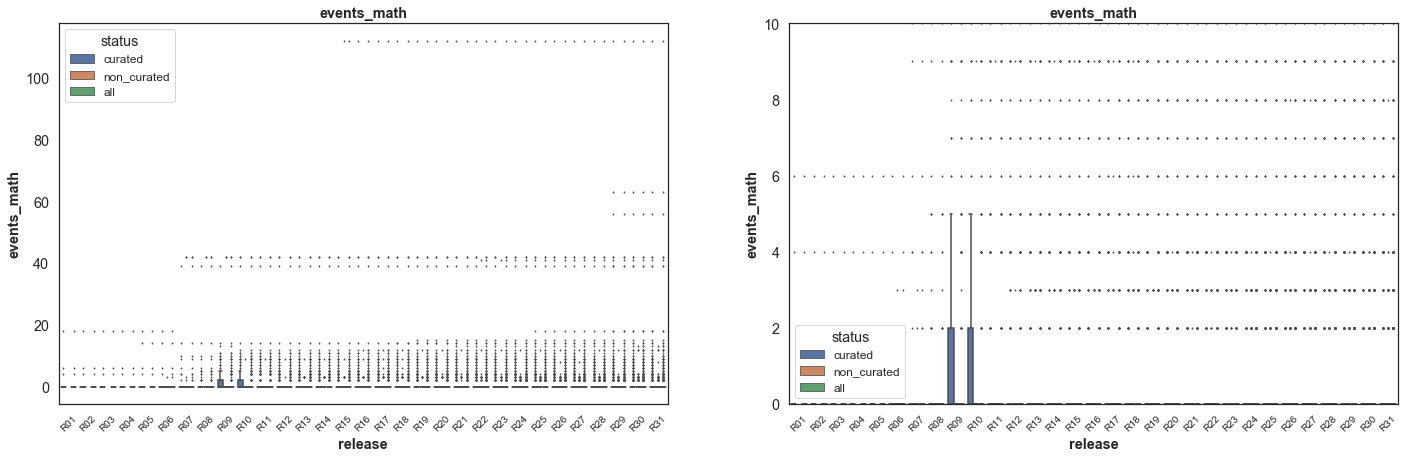

In [76]:
for yid in [
    "math",
    "function_definitions", 
    "unit_definitions",
    "compartments",
    "species",
    "parameters",
    "initial_assignments",
    "rules",
    "reactions",
    "constraints",
    "events",
    "kinetic_laws",
    "kinetic_laws_math",
    "parameters_local",
    "events_math",
    ]:
    print_statistics(yid)
    boxplot_statistics(yid)